In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [4]:
import pandas as pd 
import numpy as np
from tensorflow import keras
import tensorflow as tf
path = '/gdrive/MyDrive/heart.csv'

data = pd.read_csv(path)
print(data.shape)
print(data.columns)
print(data.head())

(303, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [5]:
X =data.drop(['output'],axis=1).values
y = data['output'].values

print(X.shape,y.shape)

(303, 13) (303,)


In [6]:
# duplication method 
Xnew = np.zeros((X.shape[0],X.shape[1],X.shape[1]))

for i in range(X.shape[0]):
  im = np.zeros((13,13))
  for j in range(X.shape[1]):
    im[j,:]=X[i,:].reshape(1,-1) # duplication of row to create 2D image
  Xnew[i,:,:]=im

In [34]:
# create the CNN model 

cnnModel = keras.models.Sequential()
# layer 1 
cnnModel.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='tanh',input_shape=(13,13,1)))
cnnModel.add(keras.layers.MaxPool2D(2,2))

# layer 2
cnnModel.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='tanh'))


# ANN 
# input layer
cnnModel.add(keras.layers.Flatten())
# hidden layer 1
cnnModel.add(keras.layers.Dense(200,activation='tanh'))
# hidden layer 2
cnnModel.add(keras.layers.Dense(500,activation='tanh'))
# hidden layer 3
cnnModel.add(keras.layers.Dense(100,activation='tanh'))
# output layer
cnnModel.add(keras.layers.Dense(2))

cnnModel.compile(optimizer='sgd',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

cnnModel.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 11, 11, 128)       1280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         147584    
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_24 (Dense)            (None, 200)               230600    
                                                                 
 dense_25 (Dense)            (None, 500)               100500    
                                                      

In [35]:
from sklearn.model_selection import train_test_split
ratio=0.5
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=ratio,
                                             random_state=2)

history = cnnModel.fit(Xtrain,ytrain,epochs=100,validation_data=(Xtest,ytest))


Epoch 1/100
5/5 [==============================] - 1s 91ms/step - loss: 1.0858 - accuracy: 0.4901 - val_loss: 0.7162 - val_accuracy: 0.4342
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 0.7034 - accuracy: 0.5033 - val_loss: 0.7289 - val_accuracy: 0.4342
Epoch 3/100
5/5 [==============================] - 0s 45ms/step - loss: 0.7404 - accuracy: 0.4636 - val_loss: 0.6852 - val_accuracy: 0.5658
Epoch 4/100
5/5 [==============================] - 0s 47ms/step - loss: 0.6860 - accuracy: 0.5828 - val_loss: 0.7913 - val_accuracy: 0.4342
Epoch 5/100
5/5 [==============================] - 0s 47ms/step - loss: 0.7605 - accuracy: 0.4967 - val_loss: 0.6920 - val_accuracy: 0.4342
Epoch 6/100
5/5 [==============================] - 0s 44ms/step - loss: 0.7200 - accuracy: 0.5033 - val_loss: 0.6972 - val_accuracy: 0.4342
Epoch 7/100
5/5 [==============================] - 0s 49ms/step - loss: 0.6804 - accuracy: 0.5960 - val_loss: 0.9074 - val_accuracy: 0.4342
Epoch 8/100
5/5 [===

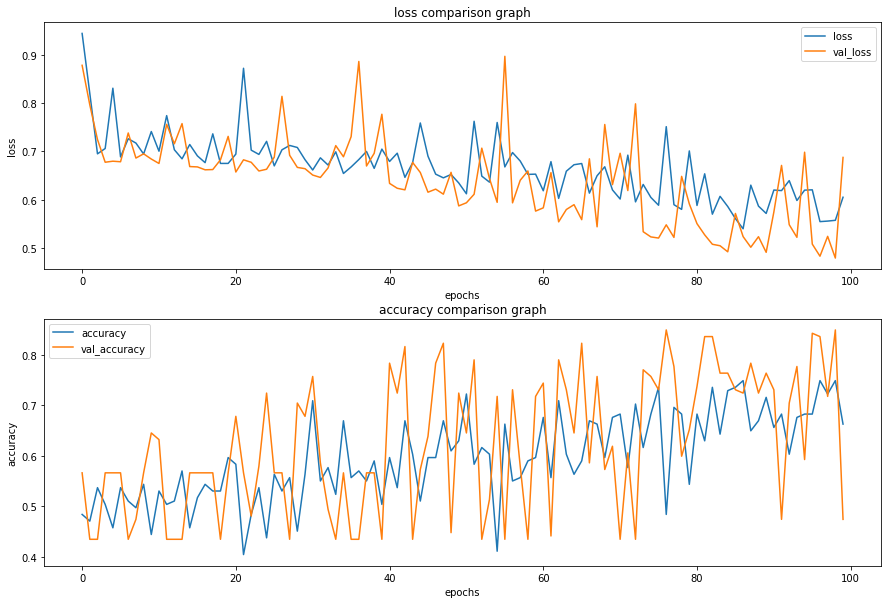

In [33]:
#history.history

import matplotlib.pyplot as plt 
plt.figure(1,figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(history.epoch,history.history['loss'],label='loss')
plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
plt.title('loss comparison graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy comparison graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()